# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here

random.randint (1,6)

4

In [5]:
for i in range (20):
    print(random.randint (1,6))

1
5
6
3
6
5
3
1
2
5
2
2
6
1
2
6
6
1
3
4


In [6]:
list =[]
for i in range (10):
    list.append(random.randint (1,6))

In [7]:
list.sort()

In [8]:
roll_df=pd.DataFrame({'rolling':list})
roll_df

,rolling
0,1
1,1
2,2
3,3
4,4
5,4
6,4
7,5
8,5
9,5


#### 2.- Plot the results sorted by value.

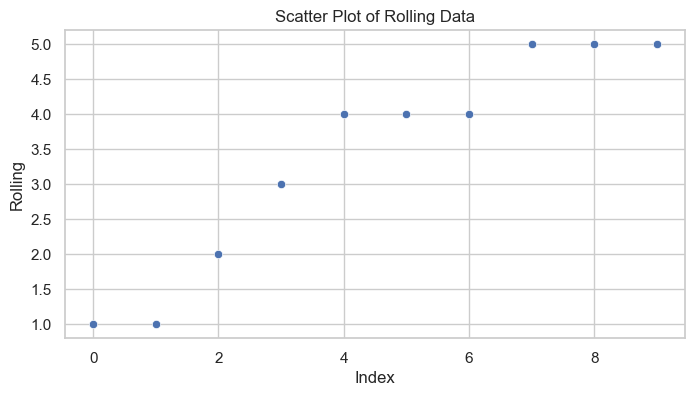

In [9]:
# your code here
sns.set(style='whitegrid')
plt.figure(figsize=(8,4))
sns.set(style='whitegrid')


sns.scatterplot(data=roll_df, x=roll_df.index, y='rolling')


plt.title('Scatter Plot of Rolling Data')
plt.xlabel('Index')
plt.ylabel('Rolling')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

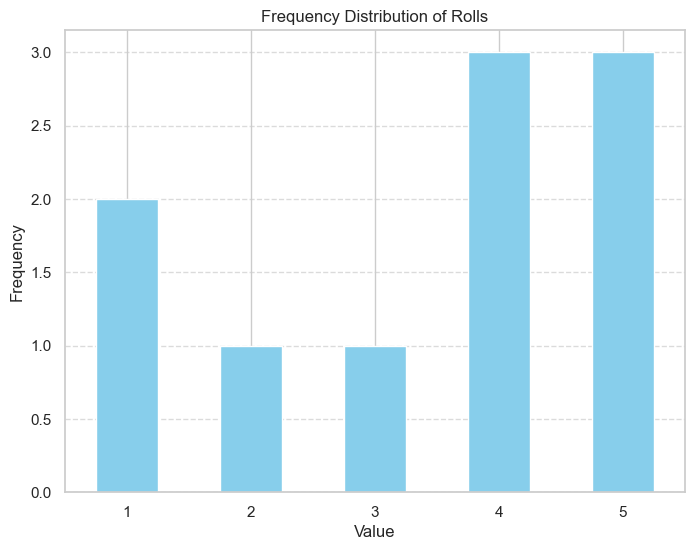

In [11]:

# Calculate the frequency distribution
frequency_distribution = roll_df['rolling'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
frequency_distribution.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Rolls')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# your code here

def plot (data_series, title='Frequency Distribution', xlabel='Value', ylabel='Frequency'):

    frequency_distribution = data_series.value_counts().sort_index()

    plt.figure(figsize=(8, 6))
    frequency_distribution.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
# your code here
def custom_mean(data):
    total_sum = 0
    num_observations = len(data)
    
    for value in data:
        total_sum += value
    
    mean = total_sum / num_observations
    
    return mean


custom_mean(list)


3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [34]:
# your code here

def custom_mean_from_frequency_distribution(freq_distribution):

    total_sum = 0
    num_observations = 0
    
    for value, frequency in freq_distribution.items():
        total_sum += value * frequency
        num_observations += frequency

    mean = total_sum / num_observations
    
    return mean


frequency_distribution = roll_df['rolling'].value_counts().sort_index()
mean_value = custom_mean_from_frequency_distribution(freq_distribution)
mean_value



3.325

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [35]:
# your code here

def custom_median(data):
  
    sorted_data = sorted(data)
    num_observations = len(sorted_data)
    
  
    if num_observations % 2 == 1: 
        median_index = num_observations // 2
        median = sorted_data[median_index]
    else:  
        upper_median_index = num_observations // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2
    
    return median


median_value = custom_median(list)

median_value

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [37]:
# your code here

def custom_quartiles(data):

    sorted_data = sorted(data)
    num_observations = len(sorted_data)
   
    if num_observations % 2 == 1: 
        median_index = num_observations // 2
        Q2 = sorted_data[median_index]
    else: 
        upper_median_index = num_observations // 2
        lower_median_index = upper_median_index - 1
        Q2 = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2

    lower_half = sorted_data[:num_observations // 2]
    upper_half = sorted_data[(num_observations + 1) // 2:]
    
    Q1 = custom_median(lower_half)
    Q3 = custom_median(upper_half)
    
    return Q1, Q2, Q3


Q1, median, Q3 = custom_quartiles(list)
print("Q1:", Q1)
print("Median (Q2):", median)
print("Q3:", Q3)


Q1: 2
Median (Q2): 4.0
Q3: 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

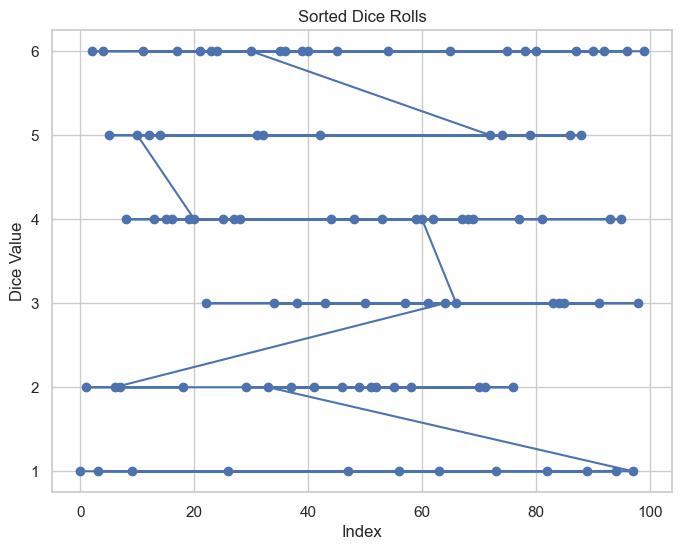

In [20]:
# your code here

df = pd.read_csv('../data/roll_the_dice_hundred.csv')

sorted_values = df['value'].sort_values()

plt.figure(figsize=(8, 6))
plt.plot(sorted_values, marker='o', linestyle='-')
plt.title('Sorted Dice Rolls')
plt.xlabel('Index')
plt.ylabel('Dice Value')
plt.grid(True)
plt.show()


In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [38]:
# your code here

df = pd.read_csv('../data/roll_the_dice_hundred.csv')

mean_value = custom_mean(df['value'])

mean_value



3.74

#### 3.- Now, calculate the frequency distribution.


In [40]:
# your code here

frequency_distribution = df['value'].value_counts().sort_index()

frequency_distribution


value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

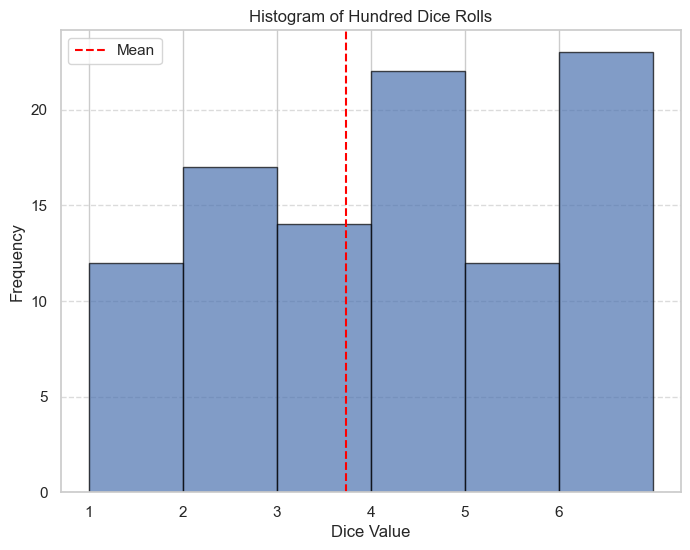

In [23]:
# your code here

plt.figure(figsize=(8, 6))
plt.hist(df['value'], bins=range(1, 8), edgecolor='black', alpha=0.7)
plt.axvline(df['value'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Histogram of Hundred Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

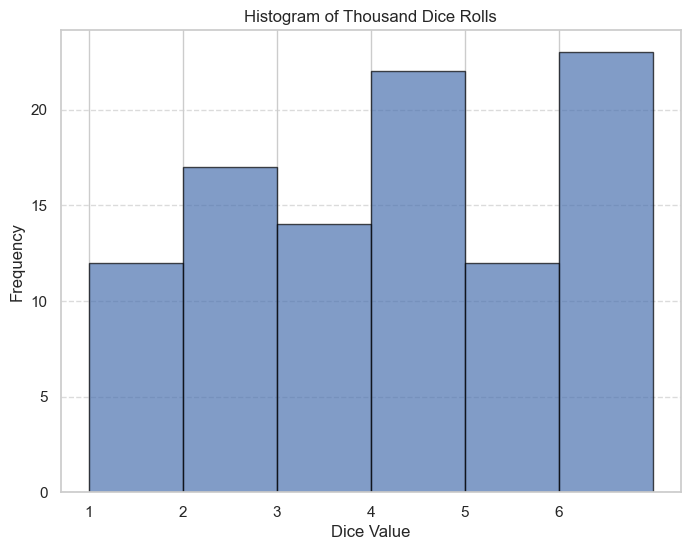

In [24]:
# your code here
plt.figure(figsize=(8, 6))
plt.hist(df['value'], bins=range(1, 8), edgecolor='black', alpha=0.7)
plt.title('Histogram of Thousand Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

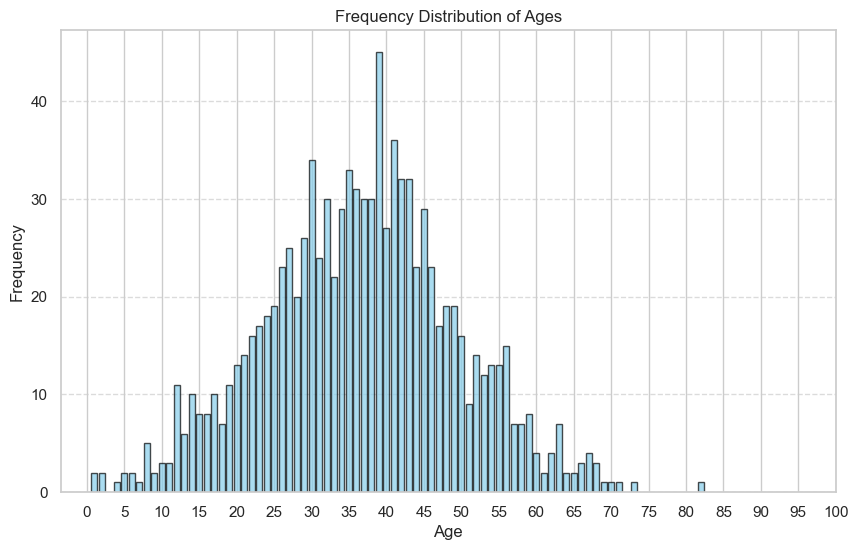

In [43]:
# your code here

df = pd.read_csv('../data/ages_population.csv')


frequency_distribution = df['observation'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [46]:
# your code here

mean_value = df['observation'].mean()
std_deviation = df['observation'].std()
print(mean_value)
std_deviation

36.56


12.816499625976762

In [45]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

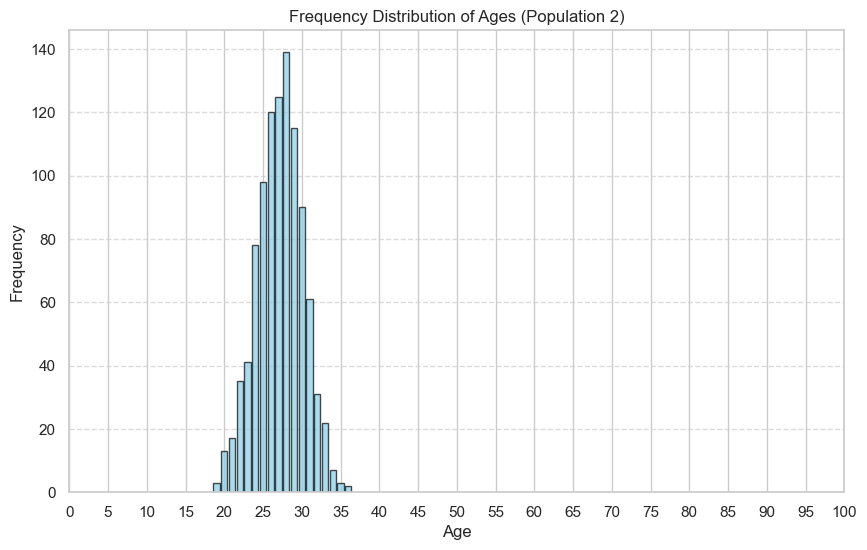

In [47]:
# your code here

df2 = pd.read_csv('../data/ages_population2.csv')

frequency_distribution2 = df2['observation'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution2.index, frequency_distribution2.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of Ages (Population 2)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [48]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [52]:
# your code here

mean_value2 = df2['observation'].mean()
std_deviation2 = df2['observation'].std()

print(mean_value2)
std_deviation2


27.155


2.969813932689186

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

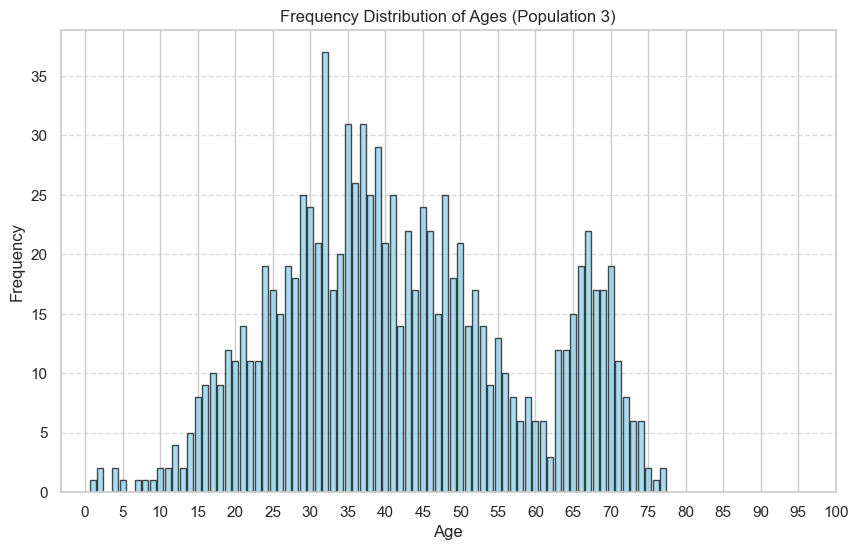

In [29]:
# your code here

df3 = pd.read_csv('../data/ages_population3.csv')

frequency_distribution3 = df3['observation'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution3.index, frequency_distribution3.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of Ages (Population 3)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [53]:
# your code here

mean_value3 = df3['observation'].mean()
std_deviation3 = df3['observation'].std()

print(mean_value3)
std_deviation3


41.989


16.144705959865934

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [31]:
# your code here

Q1, median3, Q3 = custom_quartiles(df3['observation'])

print("Q1 (Population 3):", Q1)
print("Median (Population 3):", median3)
print("Q3 (Population 3):", Q3)

difference_median_mean = median3 - mean_value3
print("\nDifference between Median and Mean:", difference_median_mean)


Q1 (Population 3): 30.0
Median (Population 3): 40.0
Q3 (Population 3): 53.0

Difference between Median and Mean: -1.9889999999999972


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here

percentiles = [0, 10, 25, 75, 90, 95, 99, 100]
percentile_values = np.percentile(df3['observation'], percentiles)


print("Percentiles (Population 3):")
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")


Percentiles (Population 3):
0th percentile: 1.0
10th percentile: 22.0
25th percentile: 30.0
75th percentile: 53.0
90th percentile: 67.0
95th percentile: 70.0
99th percentile: 74.0
100th percentile: 77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

df1 = pd.read_csv('../data/ages_population.csv')
df2 = pd.read_csv('../data/ages_population2.csv')
df3 = pd.read_csv('../data/ages_population3.csv')

stats_neighborhood1 = {
    'Mean': df1['observation'].mean(),
    'Median': df1['observation'].median(),
    'Standard Deviation': df1['observation'].std(),
    'Q1': np.percentile(df1['observation'], 25),
    'Q2': np.percentile(df1['observation'], 50),
    'Q3': np.percentile(df1['observation'], 75),
    '10th Percentile': np.percentile(df1['observation'], 10),
    '90th Percentile': np.percentile(df1['observation'], 90),
    '95th Percentile': np.percentile(df1['observation'], 95),
    '99th Percentile': np.percentile(df1['observation'], 99),
}

stats_neighborhood2 = {
    'Mean': df2['observation'].mean(),
    'Median': df2['observation'].median(),
    'Standard Deviation': df2['observation'].std(),
    'Q1': np.percentile(df2['observation'], 25),
    'Q2': np.percentile(df2['observation'], 50),
    'Q3': np.percentile(df2['observation'], 75),
    '10th Percentile': np.percentile(df2['observation'], 10),
    '90th Percentile': np.percentile(df2['observation'], 90),
    '95th Percentile': np.percentile(df2['observation'], 95),
    '99th Percentile': np.percentile(df2['observation'], 99),
}

stats_neighborhood3 = {
    'Mean': df3['observation'].mean(),
    'Median': df3['observation'].median(),
    'Standard Deviation': df3['observation'].std(),
    'Q1': np.percentile(df3['observation'], 25),
    'Q2': np.percentile(df3['observation'], 50),
    'Q3': np.percentile(df3['observation'], 75),
    '10th Percentile': np.percentile(df3['observation'], 10),
    '90th Percentile': np.percentile(df3['observation'], 90),
    '95th Percentile': np.percentile(df3['observation'], 95),
    '99th Percentile': np.percentile(df3['observation'], 99),
}


print("Statistics for Neighborhood 1:")
for key, value in stats_neighborhood1.items():
    print(f"{key}: {value}")
print()

print("Statistics for Neighborhood 2:")
for key, value in stats_neighborhood2.items():
    print(f"{key}: {value}")
print()

print("Statistics for Neighborhood 3:")
for key, value in stats_neighborhood3.items():
    print(f"{key}: {value}")


Statistics for Neighborhood 1:
Mean: 36.56
Median: 37.0
Standard Deviation: 12.816499625976762
Q1: 28.0
Q2: 37.0
Q3: 45.0
10th Percentile: 20.0
90th Percentile: 53.0
95th Percentile: 58.0
99th Percentile: 67.0

Statistics for Neighborhood 2:
Mean: 27.155
Median: 27.0
Standard Deviation: 2.969813932689186
Q1: 25.0
Q2: 27.0
Q3: 29.0
10th Percentile: 23.0
90th Percentile: 31.0
95th Percentile: 32.0
99th Percentile: 34.0

Statistics for Neighborhood 3:
Mean: 41.989
Median: 40.0
Standard Deviation: 16.144705959865934
Q1: 30.0
Q2: 40.0
Q3: 53.0
10th Percentile: 22.0
90th Percentile: 67.0
95th Percentile: 70.0
99th Percentile: 74.0


In [ ]:
"""
your comments here
"""